# Auto3D Features
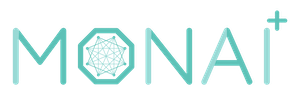

## 0. Installation (to-be-removed after PR is approved)

```bash
git clone https://github.com/mingxin-zheng/MONAI.git && cd monai
git checkout auto3d-1.0
python setup.py develop
```

## 1. Quick Start (WIP)

### 1.1 Training models

```python
from monai.apps.auto3d.auto_runner import AutoRunner

dataroot = '/data/Task04_Hippocampus'  # data directory
datalist = './examples/msd_task04_hippocampus_folds.json'  # training/validation/fold splits 
runner = AutoRunner(dataroot, datalist)
infer_path = runner.run()  # use all default settings
```

### 1.2 Inference the model ensemble (WIP)

### 1.3 Configure basic settings (WIP)

```python
runner = AutoRunner(dataroot, datalist, multigpu=True)
runner = AutoRunner(dataroot, datalist, modality="MRI")
runner = AutoRunner(dataroot, datalist, output_path="./test1")
```

### 1.4 Configure Auto3D modules in Python (WIP)
```python
from monai.apps.auto3d.auto_runner import AutoRunner

runner = AutoRunner(
    input="tasks/Task04_Hippocampus/input.yaml",
    workdir="tasks/Task04_Hippocampus",
    analyzer=True,
    configure=True,
    train=True,
    ensemble=True,
    reset=True,
)
runner.run()
```

### 1.5 Bash script compatibility for development & research

```bash
#!/bin/bash
CONFIG="tasks/Task04_Hippocampus/input.yaml"
WORKDIR="tasks/Task04_Hippocampus"

python monai/apps/auto3d/auto_runner.py --input "${CONFIG}" \
                                        --workdir "{WORKDIR}" \
                                        --analyze \
                                        --configure \
                                        --train \
                                        --ensemble \
                                        --reset
```

### 1.6 Configure network search/optimization settings (WIP)

```python
import numpy as np

runner = AutoRunner(dataroot, datalist)

infer_path = runner.run({'networks': ["unet", "segresnet"]})
infer_path = runner.run({'learning_rate': np.arange(0,0.01,0.002)}) 
```

## 2 Configure modules on a simulated dataset
### 2.1 Simulate a dataset and Auto3D datalist using MONAI functions

#### 2.1.1 Create a datalist for the simulated datasets

In [1]:
sim_datalist = {
    "testing": [
        {"image": "val_001.fake.nii.gz"},
        {"image": "val_002.fake.nii.gz"},
        {"image": "val_003.fake.nii.gz"},
        {"image": "val_004.fake.nii.gz"},
        {"image": "val_005.fake.nii.gz"},
    ],
    "training": [
        {"fold": 0, "image": "tr_image_001.fake.nii.gz", "label": "tr_label_001.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_002.fake.nii.gz", "label": "tr_label_002.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_003.fake.nii.gz", "label": "tr_label_003.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_004.fake.nii.gz", "label": "tr_label_004.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_005.fake.nii.gz", "label": "tr_label_005.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_006.fake.nii.gz", "label": "tr_label_006.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_007.fake.nii.gz", "label": "tr_label_007.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_008.fake.nii.gz", "label": "tr_label_008.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_009.fake.nii.gz", "label": "tr_label_009.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_010.fake.nii.gz", "label": "tr_label_010.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_006.fake.nii.gz", "label": "tr_label_006.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_007.fake.nii.gz", "label": "tr_label_007.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_008.fake.nii.gz", "label": "tr_label_008.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_009.fake.nii.gz", "label": "tr_label_009.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_010.fake.nii.gz", "label": "tr_label_010.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_011.fake.nii.gz", "label": "tr_label_011.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_012.fake.nii.gz", "label": "tr_label_012.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_013.fake.nii.gz", "label": "tr_label_013.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_014.fake.nii.gz", "label": "tr_label_014.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_015.fake.nii.gz", "label": "tr_label_015.fake.nii.gz"},
    ],
}

#### 2.1.2 Function to generate image data

In [2]:
import tempfile
import nibabel as nib
import numpy as np

import os
from monai.data import create_test_image_3d

def simulate():
    test_dir = tempfile.TemporaryDirectory()
    dataroot = test_dir.name

    # Generate a fake dataset
    for d in sim_datalist["testing"] + sim_datalist["training"]:
        im, seg = create_test_image_3d(39, 47, 46, rad_max=10)
        nib_image = nib.Nifti1Image(im, affine=np.eye(4))
        image_fpath = os.path.join(dataroot, d["image"])
        nib.save(nib_image, image_fpath)

        if "label" in d:
            nib_image = nib.Nifti1Image(seg, affine=np.eye(4))
            label_fpath = os.path.join(dataroot, d["label"])
            nib.save(nib_image, label_fpath)
    
    return dataroot, test_dir

sim_dataroot, test_dir = simulate()
print(sim_dataroot)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/tmp76fkdz5e


#### 2.1.3 Run the DataAnalyzer (PR #4765)

In [3]:
from monai.apps.auto3dseg.data_analyzer import DataAnalyzer

analyser = DataAnalyzer(sim_datalist, sim_dataroot)
datastat = analyser.get_all_case_stats()
print(datastat.keys())

File ./data_stats.yaml already exists and will be overwritten.
100%|██████████| 20/20 [00:01<00:00, 12.94it/s]


dict_keys([stats_summary, stats_by_cases])


### 2.2 Perform data analysis on an existing dataset

#### 2.2.1 Setup data directory

Here specify a directory with the `MONAI_DATA_DIRECTORY` environment variable to save downloaded dataset and outputs.

In [ ]:
import os
root_dir = os.environ.get("MONAI_DATA_DIRECTORY")
print(f"root dir is: {root_dir}")

#### 2.2.2 Download dataset

Downloads and extracts the dataset.  
The dataset comes from http://medicaldecathlon.com/.

In [ ]:
from monai.apps import download_and_extract

resource = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"

compressed_file = os.path.join(root_dir, "Task09_Spleen.tar")
dataroot = os.path.join(root_dir, "Task09_Spleen")
if not os.path.exists(dataroot):
    download_and_extract(resource, compressed_file, root_dir, md5)

In [ ]:
datalist = "../examples/msd_task09_spleen_folds.json"

from monai.apps.auto3dseg import DataAnalyzer

analyser = DataAnalyzer(datalist, dataroot)
datastat = analyser.get_all_case_stats()

### 2.2.3 Run the data analyzer in shell

If you have downloaded Task09_Spleen from previous step to your data directory "/worksapce/data"

```bash
python ${path_to_your_monai_repo}/apps/auto3d
            DataAnalyzer \
            get_all_case_stats \
            --datalist=${path_to_your_monai_tutorial_repo}/auto3d/examples/msd_task09_spleen_folds.json \
            --dataroot="/worksapce/data/Task09_Spleen"
```


## 2.3 Write your own data analyzer

### 2.3.1 Perform analysis on a different image meta data

In [9]:
from monai.auto3dseg.analyzer import Analyzer
from monai.auto3dseg import SegSummarizer, concat_val_to_np, SampleOperations
from copy import deepcopy


class DimsAnalyzer(Analyzer):
    def __init__(self, image_key="image", stats_name="user_stats"):
        self.image_key = image_key
        report_format = {"ndims": None}
        super().__init__(stats_name, report_format)
    def __call__(self, data):
        d = dict(data)
        report = deepcopy(self.get_report_format())
        report["ndims"] = d[self.image_key].ndim
        d[self.stats_name] = report
        return d

class DimsSummaryAnalyzer(Analyzer):
    def __init__(self, stats_name="user_stats"):
        report_format = {"ndims": None}
        super().__init__(stats_name, report_format)
        self.update_ops("ndims", SampleOperations())
    def __call__(self, data):
        report = deepcopy(self.get_report_format())
        v_np = concat_val_to_np(data, [self.stats_name, "ndims"])
        report["ndims"] = self.ops["ndims"].evaluate(v_np)
        return report

summarizer = SegSummarizer("image", "label")  # it has the three default analyzers (ImageStats, FgImageStats, LabelStats)
summarizer.add_analyzer(DimsAnalyzer(), DimsSummaryAnalyzer())

In [18]:
import torch
from tqdm import tqdm

from monai.data import DataLoader, Dataset
from monai.data.utils import no_collation
from monai.transforms import (
    Compose,
    EnsureChannelFirstd,
    EnsureTyped,
    Lambdad,
    LoadImaged,
    Orientationd,
    SqueezeDimd,
    ToDeviced,
)
from monai.utils import StrEnum, min_version, optional_import
from monai.utils.enums import DataStatsKeys, ImageStatsKeys
from monai.auto3dseg import datafold_read

def _argmax_if_multichannel(x):
    return torch.argmax(x, dim=0, keepdim=True) if x.shape[0] > 1 else x

def my_analyzer(datalist, dataroot, my_summarizer):
    keys = ["image", "label"]
    transform_list = [
        LoadImaged(keys=keys),
        EnsureChannelFirstd(keys=keys),  # this creates label to be (1,H,W,D)
        Orientationd(keys=keys, axcodes="RAS"),
        EnsureTyped(keys=keys, data_type="tensor"),
        Lambdad(keys="label", func=_argmax_if_multichannel),
        SqueezeDimd(keys=["label"], dim=0),
        ToDeviced(keys=keys, device="cuda"),
        my_summarizer,
    ]

    transform = Compose(transforms=list(filter(None, transform_list)))

    files, _ = datafold_read(datalist=datalist, basedir=dataroot, fold=-1)
    dataset = Dataset(data=files, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, collate_fn=no_collation)
    result = {DataStatsKeys.SUMMARY: {}, DataStatsKeys.BY_CASE: []}

    for batch_data in tqdm(dataloader):
        d = batch_data[0]
        stats_by_cases = {
            DataStatsKeys.BY_CASE_IMAGE_PATH: d[DataStatsKeys.BY_CASE_IMAGE_PATH],
            DataStatsKeys.BY_CASE_LABEL_PATH: d[DataStatsKeys.BY_CASE_LABEL_PATH],
            DataStatsKeys.IMAGE_STATS: d[DataStatsKeys.IMAGE_STATS],
            DataStatsKeys.FG_IMAGE_STATS: d[DataStatsKeys.FG_IMAGE_STATS],
            DataStatsKeys.LABEL_STATS: d[DataStatsKeys.LABEL_STATS],
            "user_stats": d["user_stats"]
        }


    result[DataStatsKeys.BY_CASE].append(stats_by_cases)
    result[DataStatsKeys.SUMMARY] = summarizer.summarize(result[DataStatsKeys.BY_CASE])
    return result

result = my_analyzer(sim_datalist, sim_dataroot, summarizer)


100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


In [15]:
print(result[DataStatsKeys.BY_CASE][0]['user_stats'])

{'ndims': 4}

In [17]:
print(result[DataStatsKeys.SUMMARY]['user_stats'])

{'ndims': {'max': 4, 'mean': 4.0, 'median': 4.0, 'min': 4, 'stdev': 0.0, 'percentile': [4, 4, 4, 4], 'percentile_00_5': 4, 'percentile_10_0': 4, 'percentile_90_0': 4, 'percentile_99_5': 4}}


### 2.3.2 Add a new stat operation

In [20]:
from monai.auto3dseg import SampleOperations
import torch

op = SampleOperations()
# add a new operation
op.update({"sum": np.sum})

class NewDimsSummaryAnalyzer(Analyzer):
    def __init__(self, stats_name="user_stats"):
        report_format = {"ndims": None}
        super().__init__(stats_name, report_format)
        self.update_ops("ndims", op)
    def __call__(self, data):
        report = deepcopy(self.get_report_format())
        v_np = concat_val_to_np(data, [self.stats_name, "ndims"])
        report["ndims"] = self.ops["ndims"].evaluate(v_np)
        return report

summarizer = SegSummarizer("image", "label")  # it has the three default analyzers (ImageStats, FgImageStats, LabelStats)
summarizer.add_analyzer(DimsAnalyzer(), NewDimsSummaryAnalyzer())
result = my_analyzer(sim_datalist, sim_dataroot, summarizer)

100%|██████████| 20/20 [00:00<00:00, 29.79it/s]


In [21]:
print(result[DataStatsKeys.SUMMARY]['user_stats'])

{'ndims': {'max': 4, 'mean': 4.0, 'median': 4.0, 'min': 4, 'stdev': 0.0, 'percentile': [4, 4, 4, 4], 'sum': 4, 'percentile_00_5': 4, 'percentile_10_0': 4, 'percentile_90_0': 4, 'percentile_99_5': 4}}
